In [3]:
import pandas as pd
import os
import cv2

# Load Labels.xlsx (adjust the path to your file)
labels_path = 'Labels.xlsx'
labels_df = pd.read_excel(labels_path)

# Define paths
input_folder = "parts"
output_images = "images"
output_labels = "labels"

# Create directories if they don't exist
os.makedirs(output_images, exist_ok=True)
os.makedirs(output_labels, exist_ok=True)

# Class mapping (can easily be extended or modified)
class_mapping = {
    'bryzgi': 0,
    'dendr': 1,
    'krug': 2,
    'nekclass': 3,
    'plast': 4,
    'uglov': 5
}

# Iterate over rows in the dataframe
for idx, row in labels_df.iterrows():
    # Parse data from the row
    file_path = os.path.join(input_folder, row["File Name"])
    label = row["label"]

    # Check if the label is valid
    if label not in class_mapping:
        print(f"Warning: Unknown label '{label}' in file {file_path}. Skipping...")
        continue

    # Load the image
    img = cv2.imread(file_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Unable to load image at {file_path}. Skipping...")
        continue

    h, w, _ = img.shape

    # Assume bounding boxes are predefined (e.g., from manual annotation)
    # For demonstration, we’ll consider the entire image as one fragment
    x_center, y_center, box_width, box_height = w / 2, h / 2, w, h

    # Convert class name to class index using the mapping
    class_id = class_mapping[label]

    # Write YOLO annotation (in format: class_id x_center y_center width height)
    annotation = f"{class_id} {x_center/w:.6f} {y_center/h:.6f} {box_width/w:.6f} {box_height/h:.6f}\n"
    
    # Prepare the label file path (same name as the image but with .txt extension)
    label_file = os.path.join(output_labels, os.path.splitext(os.path.basename(file_path))[0] + ".txt")

    # Write the annotation to the label file
    with open(label_file, "w") as f:
        f.write(annotation)

    # Save the image to the dataset folder
    output_image_path = os.path.join(output_images, os.path.basename(file_path))
    cv2.imwrite(output_image_path, img)

    # Print a success message (optional)
    print(f"Processed {file_path} -> {output_image_path} and {label_file}")


Processed parts\class_png_parts_bryzgi_cropped_new\AL_10_bryzgi_original.png -> images\AL_10_bryzgi_original.png and labels\AL_10_bryzgi_original.txt
Processed parts\class_png_parts_bryzgi_cropped_new\AL_10_bryzgi_flipped.png -> images\AL_10_bryzgi_flipped.png and labels\AL_10_bryzgi_flipped.txt
Processed parts\class_png_parts_bryzgi_cropped_new\AL_10_bryzgi_rotated_90.png -> images\AL_10_bryzgi_rotated_90.png and labels\AL_10_bryzgi_rotated_90.txt
Processed parts\class_png_parts_bryzgi_cropped_new\AL_10_bryzgi_rotated_180.png -> images\AL_10_bryzgi_rotated_180.png and labels\AL_10_bryzgi_rotated_180.txt
Processed parts\class_png_parts_bryzgi_cropped_new\AL_10_bryzgi_rotated_270.png -> images\AL_10_bryzgi_rotated_270.png and labels\AL_10_bryzgi_rotated_270.txt
Processed parts\class_png_parts_bryzgi_cropped_new\AL_11_bryzgi_original.png -> images\AL_11_bryzgi_original.png and labels\AL_11_bryzgi_original.txt
Processed parts\class_png_parts_bryzgi_cropped_new\AL_11_bryzgi_flipped.png -> 

In [29]:
from ultralytics import YOLO

# Загрузить предобученную YOLOv5 модель
model = YOLO('yolov8s.pt')  # Можно выбрать другую модель, например, yolov5m.pt или yolov5l.pt

# Запустить обучение
model.train(data='data.yaml', epochs=50, imgsz=150)


New https://pypi.org/project/ultralytics/8.3.55 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.24  Python-3.12.4 torch-2.5.0+cpu CPU (Intel Core(TM) i5-6600K 3.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=150, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

train: Scanning C:\Users\ivan\WORK\МАТВЕД\Частицы\YOLO\dataset\train\labels.cache... 542 images, 0 backgrounds, 0 corru
val: Scanning C:\Users\ivan\WORK\МАТВЕД\Частицы\YOLO\dataset\val\labels.cache... 233 images, 0 backgrounds, 0 corrupt: 

Plotting labels to runs\detect\train14\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 0 dataloader workers
Logging results to runs\detect\train14
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.7343       2.67      1.204         41        160: 100%|██████████| 34/34 [00:54<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<0

                   all        233        233      0.179      0.939      0.213      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.3834      1.738     0.9891         46        160: 100%|██████████| 34/34 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<0

                   all        233        233      0.184      0.792      0.331      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.3763       1.61     0.9624         38        160: 100%|██████████| 34/34 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<0

                   all        233        233      0.264      0.634       0.31      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      0.325      1.537     0.9557         39        160: 100%|██████████| 34/34 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<0

                   all        233        233      0.251      0.648      0.355      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.3075      1.498     0.9459         46        160: 100%|██████████| 34/34 [00:54<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<0


                   all        233        233      0.311      0.579      0.402      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.2762      1.422     0.9414         39        160: 100%|██████████| 34/34 [02:43<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<0


                   all        233        233      0.271      0.707      0.357      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.2643      1.428     0.9319         47        160: 100%|██████████| 34/34 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<0

                   all        233        233       0.37      0.609      0.431      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.2598      1.396      0.924         43        160: 100%|██████████| 34/34 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<0

                   all        233        233      0.343      0.743      0.503      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.2377      1.361     0.9153         39        160: 100%|██████████| 34/34 [02:59<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:39<0


                   all        233        233      0.295      0.672      0.482      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.2431      1.313     0.9295         46        160: 100%|██████████| 34/34 [03:01<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:23<0


                   all        233        233      0.243      0.525      0.364      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.2351      1.359     0.9252         40        160: 100%|██████████| 34/34 [01:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:03<0


                   all        233        233      0.258      0.717        0.3      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.2355      1.328     0.9155         45        160: 100%|██████████| 34/34 [03:15<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:26<0


                   all        233        233      0.342      0.653      0.491      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.2196      1.277     0.9231         46        160: 100%|██████████| 34/34 [01:22<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<0


                   all        233        233      0.425      0.749      0.559      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      0.218      1.282     0.9243         46        160: 100%|██████████| 34/34 [03:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:26<0


                   all        233        233      0.416      0.734      0.589      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.2138      1.245     0.9169         39        160: 100%|██████████| 34/34 [01:52<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:21<0


                   all        233        233      0.366      0.679      0.482      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.2193       1.22     0.9196         48        160: 100%|██████████| 34/34 [01:59<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<0


                   all        233        233      0.437      0.761       0.57      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.2035      1.205     0.9106         44        160: 100%|██████████| 34/34 [04:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:39<0


                   all        233        233      0.421      0.539      0.458      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.1985      1.188     0.9093         40        160: 100%|██████████| 34/34 [02:48<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:26<0


                   all        233        233      0.374       0.65      0.535      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.1917      1.159     0.9123         45        160: 100%|██████████| 34/34 [01:22<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<0


                   all        233        233      0.398      0.684      0.546      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.1881      1.156     0.9138         40        160: 100%|██████████| 34/34 [03:09<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:26<0


                   all        233        233      0.353      0.657      0.518      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.1875      1.126     0.9119         48        160: 100%|██████████| 34/34 [01:51<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:22<0


                   all        233        233       0.46      0.703      0.595      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.1834      1.142     0.9061         34        160: 100%|██████████| 34/34 [03:32<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:27<0


                   all        233        233      0.454       0.81      0.633       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.1826      1.086     0.9163         44        160: 100%|██████████| 34/34 [02:40<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<0


                   all        233        233      0.453      0.714      0.635      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.1773      1.115     0.9023         41        160: 100%|██████████| 34/34 [01:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<0

                   all        233        233      0.514      0.771      0.704      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.1796      1.081     0.9144         46        160: 100%|██████████| 34/34 [03:17<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<0


                   all        233        233      0.463      0.671      0.572      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.1738      1.058     0.9188         40        160: 100%|██████████| 34/34 [01:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<0


                   all        233        233      0.478      0.755      0.701      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.1651      1.044     0.9068         43        160: 100%|██████████| 34/34 [02:20<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:49<0


                   all        233        233       0.59      0.717       0.69      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.1621      1.092      0.903         42        160: 100%|██████████| 34/34 [03:01<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:23<0


                   all        233        233      0.379      0.749      0.602        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      0.161       1.03     0.9084         44        160: 100%|██████████| 34/34 [01:20<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:02<0


                   all        233        233      0.564      0.689      0.703      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.1615     0.9973     0.9045         40        160: 100%|██████████| 34/34 [01:53<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<0


                   all        233        233      0.571       0.67       0.68      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.1516     0.9608     0.9085         35        160: 100%|██████████| 34/34 [01:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<0


                   all        233        233      0.427      0.707      0.592      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.1497     0.9441     0.9062         44        160: 100%|██████████| 34/34 [01:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<0


                   all        233        233      0.519      0.713      0.688      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.1601     0.9265     0.9062         41        160: 100%|██████████| 34/34 [01:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:27<0


                   all        233        233      0.704      0.602      0.691      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.1565     0.9145      0.902         43        160: 100%|██████████| 34/34 [01:50<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<0


                   all        233        233      0.457      0.777      0.704      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.1583     0.8986     0.9008         48        160: 100%|██████████| 34/34 [01:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<0

                   all        233        233      0.489      0.835      0.729      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.1516     0.9008     0.9123         40        160: 100%|██████████| 34/34 [02:37<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<0


                   all        233        233      0.708      0.794      0.811      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.1459     0.8691     0.9052         40        160: 100%|██████████| 34/34 [02:19<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:31<0


                   all        233        233      0.595      0.662      0.737      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.1398      0.864     0.8999         45        160: 100%|██████████| 34/34 [02:08<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<0


                   all        233        233      0.623      0.774      0.781      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.1385     0.8009     0.8951         48        160: 100%|██████████| 34/34 [02:20<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:21<0


                   all        233        233      0.599      0.817        0.8      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.1401     0.8246     0.9051         49        160: 100%|██████████| 34/34 [01:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<0

                   all        233        233       0.63      0.819      0.821      0.819


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.1224     0.9342     0.9155         14        160: 100%|██████████| 34/34 [03:04<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:26<0


                   all        233        233      0.642      0.756      0.754      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.1032     0.6846     0.9068         14        160: 100%|██████████| 34/34 [01:21<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:23<0


                   all        233        233      0.598       0.83      0.806      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G    0.09384      0.598     0.9032         14        160: 100%|██████████| 34/34 [01:06<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:20<0


                   all        233        233      0.792      0.824      0.885      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G    0.08809     0.5014     0.9119         14        160: 100%|██████████| 34/34 [02:45<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:23<0


                   all        233        233      0.663      0.801      0.862      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G    0.08287     0.4522     0.8984         14        160: 100%|██████████| 34/34 [01:07<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<0


                   all        233        233      0.716      0.764      0.861      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G    0.07882     0.4376      0.895         14        160: 100%|██████████| 34/34 [02:08<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:28<0


                   all        233        233      0.694      0.781      0.829      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G    0.07673     0.4203     0.8997         14        160: 100%|██████████| 34/34 [01:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<0

                   all        233        233      0.764       0.78      0.881      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G    0.07245     0.3721     0.8972         14        160: 100%|██████████| 34/34 [02:17<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:33<0


                   all        233        233      0.824      0.865       0.92      0.917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G    0.07145     0.3582     0.9016         14        160: 100%|██████████| 34/34 [01:59<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:22<0


                   all        233        233      0.839      0.849      0.919      0.917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G    0.07191     0.3389     0.8925         14        160: 100%|██████████| 34/34 [03:11<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:22<0


                   all        233        233      0.803       0.87      0.906      0.903

50 epochs completed in 2.711 hours.
Optimizer stripped from runs\detect\train14\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train14\weights\best.pt, 22.5MB

Validating runs\detect\train14\weights\best.pt...
Ultralytics 8.3.24  Python-3.12.4 torch-2.5.0+cpu CPU (Intel Core(TM) i5-6600K 3.50GHz)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:21<0


                   all        233        233      0.824      0.867      0.921      0.918
              splashes         40         40      0.798      0.887      0.916      0.916
             dendrites         40         40       0.76       0.75      0.844      0.844
                circle         47         47      0.938      0.936      0.988      0.988
               unknown         47         47      0.972      0.734      0.927      0.927
                plates         45         45      0.716      0.896      0.909      0.909
               angular         14         14      0.761          1      0.943      0.926
Speed: 0.7ms preprocess, 74.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train14


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000157D7840620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

In [28]:
from ultralytics import YOLO
import os

# Загрузить обученную модель
model = YOLO(r'C:\Users\ivan\WORK\МАТВЕД\Частицы\YOLO\runs\detect\train13\weights\best.pt')  # Укажите путь к обученной модели

# Применить модель к новому изображению
results = model(r'C:\Users\ivan\WORK\particles\SEM\Al\Al0010.jpg')

# Показать результаты
results[0].show()  # Показывает изображение с отмеченными объектами

# Сохранить результаты
output_dir = 'results'
os.makedirs(output_dir, exist_ok=True)
output_image_path = os.path.join(output_dir, 'resul.jpg')  # Specify the filename and path

# Save the result to the specified path
results[0].save(filename=output_image_path)  # Сохраняет результат в указанном файле

# Вывести найденные объекты
for box in results[0].boxes.data.tolist():
    x1, y1, x2, y2, confidence, class_id = box
    print(f"Объект класса {class_id} с уверенностью {confidence:.2f} на координатах: ({x1}, {y1}, {x2}, {y2})")



image 1/1 C:\Users\ivan\WORK\particles\SEM\Al\Al0010.jpg: 160x160 1 splashes, 1 dendrites, 1 circle, 1 angular, 57.0ms
Speed: 1.0ms preprocess, 57.0ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 160)
Объект класса 5.0 с уверенностью 0.93 на координатах: (0.0, 0.4350646734237671, 1020.4779052734375, 1013.3997802734375)
Объект класса 1.0 с уверенностью 0.84 на координатах: (0.0, 1.9195555448532104, 1010.9600830078125, 1012.0548706054688)
Объект класса 0.0 с уверенностью 0.81 на координатах: (0.0, 1.8863524198532104, 1016.5040893554688, 1018.2567749023438)
Объект класса 2.0 с уверенностью 0.56 на координатах: (0.0, 3.034558057785034, 1024.0, 1012.6525268554688)



image 1/1 C:\Users\ivan\WORK\\\SEM\Al\Al0001.jpg: 160x160 1 angular, 57.7ms
Speed: 0.0ms preprocess, 57.7ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 160)


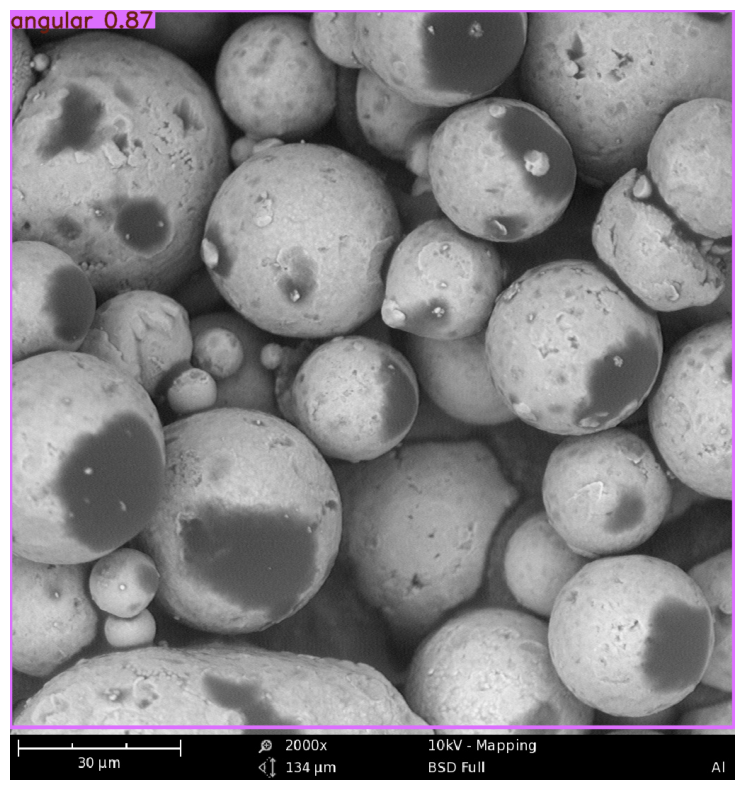

Объект класса 5.0 с уверенностью 0.87 на координатах: (0.0, 0.0, 1022.7508544921875, 1013.9883422851562)


In [2]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import cv2

# Загрузить обученную модель
model = YOLO(r'C:\Users\ivan\WORK\МАТВЕД\Частицы\YOLO\runs\detect\train14\weights\best.pt')  # Укажите путь к обученной модели

# Применить модель к новому изображению
results = model(r'C:\Users\ivan\WORK\МАТВЕД\Частицы\SEM\Al\Al0001.jpg')

# Показать результаты на экране Jupyter
# Получаем изображение с аннотациями
annotated_img = results[0].plot()  # Это изображение с аннотациями

# Используем matplotlib для отображения изображения в Jupyter
plt.figure(figsize=(10, 10))
plt.imshow(annotated_img)
plt.axis('off')  # Отключаем оси для красивого отображения
plt.show()

# Сохранить результаты
output_dir = 'results'
os.makedirs(output_dir, exist_ok=True)
output_image_path = os.path.join(output_dir, 'Al0012_resul.jpg')  # Указываем путь для сохранения

# Сохраняем изображение с аннотациями
results[0].save(filename=output_image_path)  # Сохраняет результат в указанном файле

# Вывести найденные объекты
for box in results[0].boxes.data.tolist():
    x1, y1, x2, y2, confidence, class_id = box
    print(f"Объект класса {class_id} с уверенностью {confidence:.2f} на координатах: ({x1}, {y1}, {x2}, {y2})")


In [24]:
import os
import random
import shutil

# Путь к папкам с изображениями и лейблами
images_dir = "C:/Users/ivan/WORK/МАТВЕД/Частицы/YOLO/dataset/images"
labels_dir = "C:/Users/ivan/WORK/МАТВЕД/Частицы/YOLO/dataset/labels"

# Папки для результата
output_dir = "C:/Users/ivan/WORK/МАТВЕД/Частицы/YOLO/dataset"
train_images_dir = os.path.join(output_dir, "train/images")
train_labels_dir = os.path.join(output_dir, "train/labels")
val_images_dir = os.path.join(output_dir, "val/images")
val_labels_dir = os.path.join(output_dir, "val/labels")

# Создаем папки для train и val
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Получаем список файлов изображений
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]

# Перемешиваем файлы и делим на 70/30
random.seed(42)  # Для воспроизводимости
random.shuffle(image_files)
split_index = int(len(image_files) * 0.7)
train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Копируем файлы для train
for file in train_files:
    # Копируем изображения
    shutil.copy2(os.path.join(images_dir, file), os.path.join(train_images_dir, file))
    # Копируем соответствующий файл лейбла
    label_file = os.path.splitext(file)[0] + ".txt"
    shutil.copy2(os.path.join(labels_dir, label_file), os.path.join(train_labels_dir, label_file))

# Копируем файлы для val
for file in val_files:
    # Копируем изображения
    shutil.copy2(os.path.join(images_dir, file), os.path.join(val_images_dir, file))
    # Копируем соответствующий файл лейбла
    label_file = os.path.splitext(file)[0] + ".txt"
    shutil.copy2(os.path.join(labels_dir, label_file), os.path.join(val_labels_dir, label_file))

print("Данные успешно распределены:")
print(f"Train: {len(train_files)} файлов")
print(f"Val: {len(val_files)} файлов")


Данные успешно распределены:
Train: 542 файлов
Val: 233 файлов
